In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/covid/influd_5may/INFLU20-04052020.csv',sep=';',encoding = "ISO-8859-1")



# Selecting people from South Center with COVID-19
df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')| (df['SG_UF_NOT']=='RS')\
| (df['SG_UF_NOT']=='SC')| (df['SG_UF_NOT']=='DF')| (df['SG_UF_NOT']=='ES')| (df['SG_UF_NOT']=='PR')\
| (df['SG_UF_NOT']=='MG')| (df['SG_UF_NOT']=='MS')| (df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]\
 [df['CS_RACA']!=9.0][df['CS_RACA'].notna()][df['HOSPITAL']==1]



# Selecting people from North Northeast with COVID-19
#df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='RO') | (df['SG_UF_NOT']=='TO')| (df['SG_UF_NOT']=='RN')\
#| (df['SG_UF_NOT']=='PE')| (df['SG_UF_NOT']=='AM')| (df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
#| (df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')| (df['SG_UF_NOT']=='RR')| (df['SG_UF_NOT']=='AC')\
#| (df['SG_UF_NOT']=='PA')| (df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')| (df['SG_UF_NOT']=='MA')
#| (df['SG_UF_NOT']=='AP')][df['CS_RACA']!=9.0][df['CS_RACA'].notna()][df['HOSPITAL']==1]



#print('confirmed data in North Northeast:',df.shape[0])
print('confirmed data in South Center:',df.shape[0])

/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,61,62,63,105,107,123,132,136) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


confirmed data in South Center: 9278


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
df = df[['NU_IDADE_N','CS_RACA','EVOLUCAO']]


In [4]:
# boxing the age feature

bins = [0, 40, 50, 60, 70, 150]
names = ['<40', '40-50', '50-60','60-70','>=70']


df['NU_IDADE_N'] = pd.cut(df['NU_IDADE_N'], bins=bins, labels=names, right= False)

df['NU_IDADE_N'] = df['NU_IDADE_N'].map({'<40': 40, '40-50':50, '50-60':60, '60-70':70, '>=70':80})



In [5]:
# Normalization

white = df['NU_IDADE_N'][((df['CS_RACA'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
black = df['NU_IDADE_N'][((df['CS_RACA'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
yellow = df['NU_IDADE_N'][((df['CS_RACA'] == 3)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
brown = df['NU_IDADE_N'][((df['CS_RACA'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)


In [6]:
# Death and Cure patients divided by color and age bins

# Death
white_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
black_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
yellow_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
brown_dea = df['NU_IDADE_N'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)

# Cured
white_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
black_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
yellow_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
brown_cur = df['NU_IDADE_N'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)


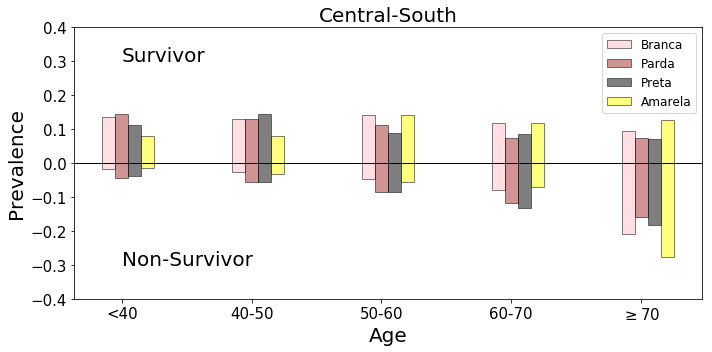

In [7]:
# Plotting graphic

barWidth = 1

plt.figure(figsize=(10,5))

plt.bar(white_cur.index-1, white_cur/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(brown_cur.index, brown_cur/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(black_cur.index+1, black_cur/black.sum(), color='black', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(yellow_cur.index+2, yellow_cur/yellow.sum(), color='yellow', alpha =0.5, width=barWidth, edgecolor='black',linewidth=1)

plt.bar(white_dea.index-1, -white_dea/white.sum(), color='pink',alpha =0.5,width=barWidth, edgecolor='black', label='Branca',linewidth=1)
plt.bar(brown_dea.index, -brown_dea/brown.sum(), color='brown', alpha =0.5,width=barWidth, edgecolor='black', label='Parda',linewidth=1)
plt.bar(black_dea.index+1, -black_dea/black.sum(), color='black', alpha =0.5, width=barWidth, edgecolor='black', label='Preta',linewidth=1)
plt.bar(yellow_dea.index+2, -yellow_dea/yellow.sum(), color='yellow', alpha =0.5, width=barWidth, edgecolor='black', label='Amarela',linewidth=1)


plt.legend(fontsize=12)
#plt.title('North', fontsize=20)
plt.title('Central-South', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Age', fontsize=20)
x = [40, 50, 60, 70, 80]
plt.xticks(x, ('<40', '40-50', '50-60','60-70','$\geq$70'))
plt.ylim(-0.4,0.4)
plt.text(40, 0.3, 'Survivor', fontsize=20)
plt.text(40, -0.3, 'Non-Survivor', fontsize=20)
plt.axhline(y=0,linewidth=1,color='k')
plt.tight_layout()
#plt.savefig('north_age.pdf')
plt.savefig('south_age.pdf')
plt.show()

